In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter

In [2]:
markers = ['o', 's', '+', '^', '.', '*']
LEGEND_SIZE=15
LABEL_SIZE=18
TICK_SIZE=15
FIG_W_SIZE=6
FIG_H_SIZE=3
META_WIDTH = 5
y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
META_YLIM=(1,2000000)
META_WIDTH = 5

In [ ]:
DATA_DIR="data/"

In [3]:
 # 500ms timeout, 10 max retries
ok_df = pd.read_csv("../fig6a/data/meta1_hotel_blueprint_10000_1.csv")
trigger_df = pd.read_csv("../fig6a/data/meta1_hotel_blueprint_30000_3.csv")
not_ok_df = pd.read_csv("../fig6a/data/meta1_hotel_blueprint_10000_2.csv")

In [4]:
min_start = np.min(ok_df.Start)
ok_df['start_rel'] = (ok_df.Start - min_start) / 1e9 # Convert to seconds
trigger_df['start_rel'] = (trigger_df.Start - min_start) / 1e9 # Convert to seconds
not_ok_df['start_rel'] = (not_ok_df.Start - min_start) / 1e9 # Convert to seconds
ok_df.Duration = ok_df.Duration / 1e6 # Convert to ms
not_ok_df.Duration = not_ok_df.Duration / 1e6 # Convert to ms
trigger_df.Duration = trigger_df.Duration / 1e6 # Convert to ms
ok_df['start_rel'] = ok_df['start_rel'].astype(int)
not_ok_df['start_rel'] = not_ok_df['start_rel'].astype(int)
trigger_df['start_rel'] = trigger_df['start_rel'].astype(int)
big_df = pd.concat([ok_df, trigger_df, not_ok_df])

In [5]:
def q99(x):
    return x.quantile(0.99)

filtered_df = big_df.groupby(big_df['start_rel']).agg(start_rel=('start_rel', 'mean'), avg=('Duration', 'mean'), p99=('Duration', q99))

In [6]:
trigger_start = np.min(trigger_df['start_rel'])
trigger_end = np.max(trigger_df['start_rel'])

In [7]:
# 500ms timeout, 10 max retries
ok_df = pd.read_csv(DATA_DIR + "meta1_hotel_blueprint_cb_10000_1.csv")
trigger_df = pd.read_csv(DATA_DIR + "meta1_hotel_blueprint_cb_30000.csv")
not_ok_df = pd.read_csv(DATA_DIR + "meta1_hotel_blueprint_cb_10000_2.csv")
min_start = np.min(ok_df.Start)
ok_df['start_rel'] = (ok_df.Start - min_start) / 1e9 # Convert to seconds
trigger_df['start_rel'] = (trigger_df.Start - min_start) / 1e9 # Convert to seconds
not_ok_df['start_rel'] = (not_ok_df.Start - min_start) / 1e9 # Convert to seconds
ok_df.Duration = ok_df.Duration / 1e6 # Convert to ms
not_ok_df.Duration = not_ok_df.Duration / 1e6 # Convert to ms
trigger_df.Duration = trigger_df.Duration / 1e6 # Convert to ms
ok_df['start_rel'] = ok_df['start_rel'].astype(int)
not_ok_df['start_rel'] = not_ok_df['start_rel'].astype(int)
trigger_df['start_rel'] = trigger_df['start_rel'].astype(int)
trigger_start = np.min(trigger_df['start_rel'])
trigger_end = np.max(trigger_df['start_rel'])
big_df = pd.concat([ok_df, trigger_df, not_ok_df])

In [9]:
filtered_cb_df = big_df.groupby(big_df['start_rel']).agg(start_rel=('start_rel', 'mean'), avg=('Duration', 'mean'), p99=('Duration', q99))

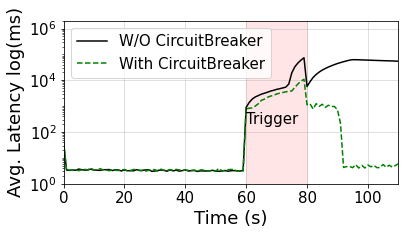

In [10]:
fig, ax = plt.subplots(figsize=(FIG_W_SIZE,FIG_H_SIZE))
ax.plot(filtered_df.start_rel, filtered_df.avg, label='W/O CircuitBreaker', color='black')
ax.plot(filtered_cb_df.start_rel, filtered_cb_df.avg, label='With CircuitBreaker', color='green', linestyle='--')
ax.set_ylim(*META_YLIM)
ax.set_yscale('log')
ax.set_xlabel('Time (s)',fontsize=LABEL_SIZE)
ax.set_ylabel('Avg. Latency log(ms)', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=TICK_SIZE)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid(visible=True, which='major', axis='both', alpha=0.5)
#ax.add_patch(Rectangle((trigger_start,0), trigger_end-trigger_start, 100000, facecolor="red", alpha=0.1))
ax.axvspan(trigger_start, trigger_end, color="red", alpha=0.1)
ax.text(60, 200, "Trigger", fontsize=LEGEND_SIZE)
plt.margins(x=0,y=0)
#ax.axvline(x=trigger_start, color="red", linestyle="--")
#ax.axvline(x=trigger_end, color="red", linestyle="--")
ax.legend(fontsize=LEGEND_SIZE)
fig.savefig('meta1-cbsol.pdf', bbox_inches='tight')
plt.show()